In [20]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import dlib

In [21]:
def read_img(img_path, width, height):
    img_bgr = cv2.imread(img_path)
    img_bgr = cv2.resize(img_bgr, (width, height))
    img_show = img_bgr.copy()
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
  
    return img_bgr, img_rgb, img_show

In [22]:
def detect_bbox(img_rgb, img_show):
    detector_hog = dlib.get_frontal_face_detector()
    dlib_rects = detector_hog(img_rgb, 1)
    
    for dlib_rect in dlib_rects:
        l = dlib_rect.left()
        t = dlib_rect.top()
        r = dlib_rect.right()
        b = dlib_rect.bottom()

        cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

    img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
   
    return dlib_rects

In [23]:
def detect_landmark(model_path, img_rgb, img_show, dlib_rects):
    landmark_predictor = dlib.shape_predictor(model_path)
    
    list_landmarks = []
    for dlib_rect in dlib_rects:
        points = landmark_predictor(img_rgb, dlib_rect)
        list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        list_landmarks.append(list_points)
    
    for landmark in list_landmarks:
        for idx, point in enumerate(list_points):
            cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

    img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
  
    return list_landmarks

In [24]:
def set_sticker(sticker_path, dlib_rects, list_landmarks, img_bgr):
    for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
        x = landmark[30][0]
        y = landmark[30][1] - dlib_rect.width()//2
        w = dlib_rect.width()
        h = dlib_rect.height()
      
    img_sticker = cv2.imread(sticker_path)
    img_sticker = cv2.resize(img_sticker, (w,h)) #스티커를 bbox 사이즈로 resize
    
    refined_x = x - w // 2  # left
    refined_y = (y - h) - (h // 2)       # top
    
    if refined_y < 0:
        img_sticker = img_sticker[-refined_y:]

        refined_y = 0
        print ('(x,y) : (%d,%d)'%(refined_x, refined_y))
    
    else:
        print ('(x,y) : (%d,%d)'%(refined_x, refined_y))   
    sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
    img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
        np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
    plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
    plt.show()

(x,y) : (253,0)


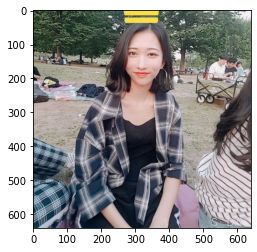

(x,y) : (193,90)


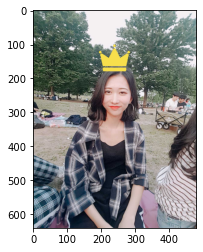

In [27]:
if __name__ == "__main__":
    img_path = os.getenv('HOME')+'/workspace/Modulabs-Dasol/Study/prj5_snowapp/images/test.jpg'
    model_path = os.getenv('HOME')+'/workspace/Modulabs-Dasol/Study/prj5_snowapp/models/shape_predictor_68_face_landmarks.dat'
    sticker_path = os.getenv('HOME')+'/workspace/Modulabs-Dasol/Study/prj5_snowapp/images/king.png'

    img = read_img(img_path, 640, 640)
    
    bbox = detect_bbox(img[1], img[2])
    landmark = detect_landmark(model_path, img[1], img[2], bbox)
    out1 = set_sticker(sticker_path, bbox, landmark, img[0])
    
    img_path = os.getenv('HOME')+'/workspace/Modulabs-Dasol/Study/prj5_snowapp/images/Dasol.jpg'
    model_path = os.getenv('HOME')+'/workspace/Modulabs-Dasol/Study/prj5_snowapp/models/shape_predictor_68_face_landmarks.dat'
    sticker_path = os.getenv('HOME')+'/workspace/Modulabs-Dasol/Study/prj5_snowapp/images/king.png'

    img = read_img(img_path, 480, 640)
    
    bbox = detect_bbox(img[1], img[2])
    landmark = detect_landmark(model_path, img[1], img[2], bbox)
    out2 = set_sticker(sticker_path, bbox, landmark, img[0])
